# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
dataset['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


## Splitting the dataset into the Training set and Test set

In [8]:
X = dataset[['Age', 'EstimatedSalary']]

In [9]:
Y = dataset['Purchased']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression


## Predicting a new result

In [14]:
def plot_decision_boundary(X, y, model, title,warna1,warna2):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                       np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
  plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha=0.75, cmap=ListedColormap((warna1, warna2)))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap((warna1, warna2))(i), label=j)
    plt.legend()
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

## Making the Confusion Matrix

In [15]:
def confusion_matrix_plot(y_true, y_pred, title,warna):
  cm = confusion_matrix(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap=warna, cbar=False)
  print("Accuracy:", accuracy)
  plt.title(title)

Accuracy: 0.275


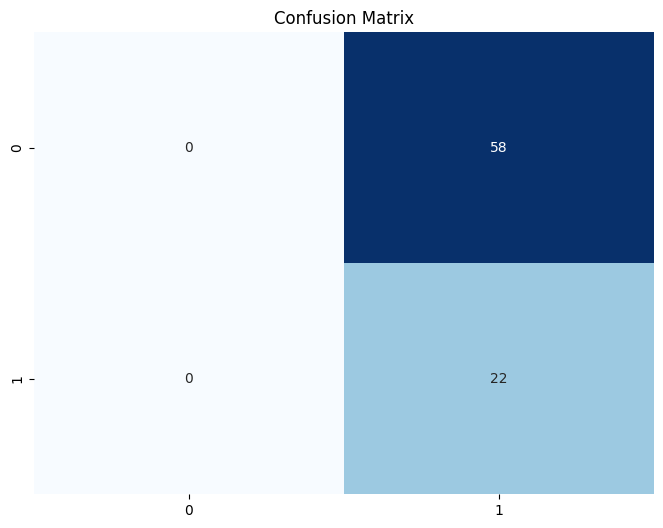

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

X_train = np.random.rand(100, 2)
Y_train = np.random.randint(0, 2, 100)

model = SVC(kernel='linear', random_state=0)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

confusion_matrix_plot(Y_test, y_pred, "Confusion Matrix", "Blues")

## Logistic Regression Model

In [30]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [31]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

## Visualising the Training set results

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

<ipython-input-14-4537bd447978>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


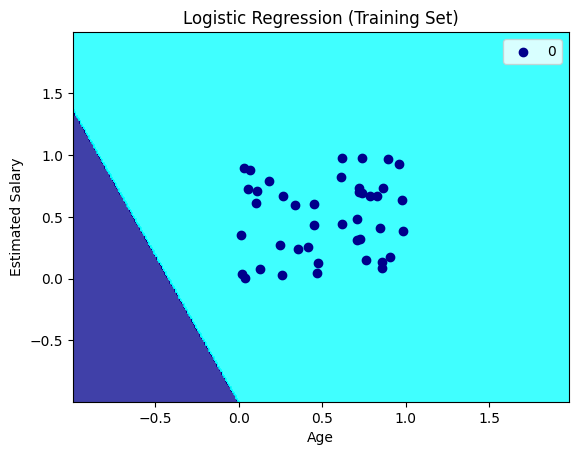

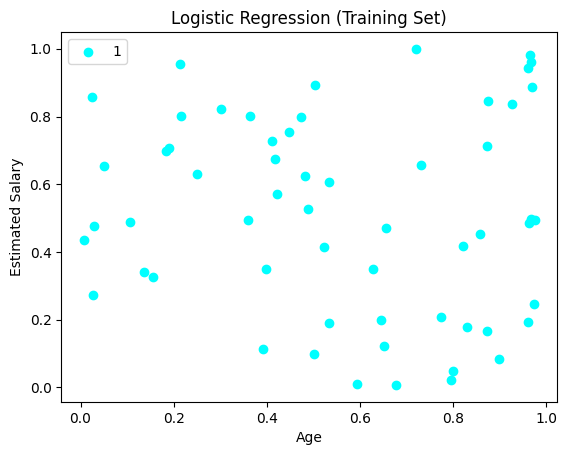

In [33]:
plot_decision_boundary(X_train, Y_train, classifier, title="Logistic Regression (Training Set)", warna1="darkblue", warna2="cyan")


## Visualising the Test set results

<ipython-input-14-4537bd447978>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


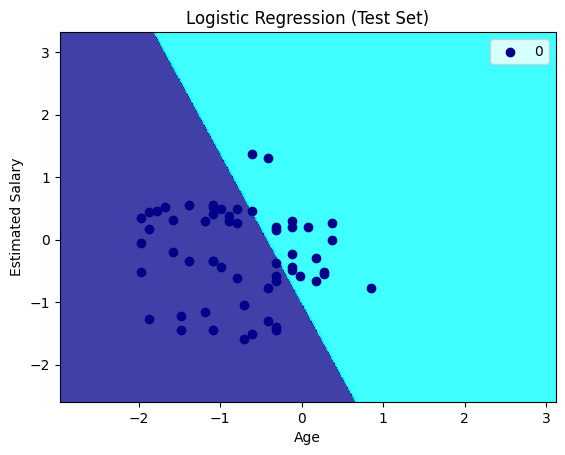

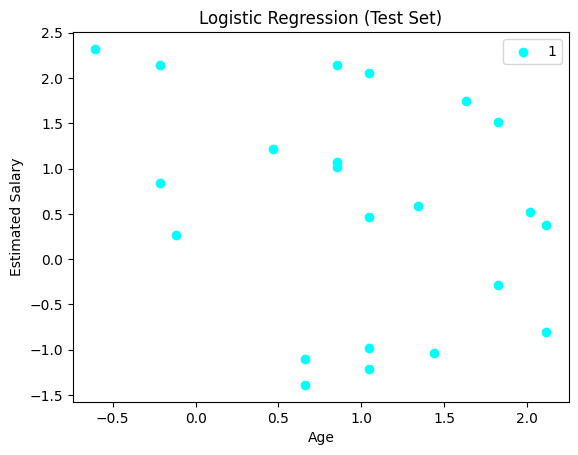

In [34]:
plot_decision_boundary(X_test, Y_test, classifier, title="Logistic Regression (Test Set)", warna1="darkblue", warna2="cyan")


## K-NN Model


In [35]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [36]:
KNeighborsClassifier()

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

## Making the Confusion Matrix

Accuracy: 0.725


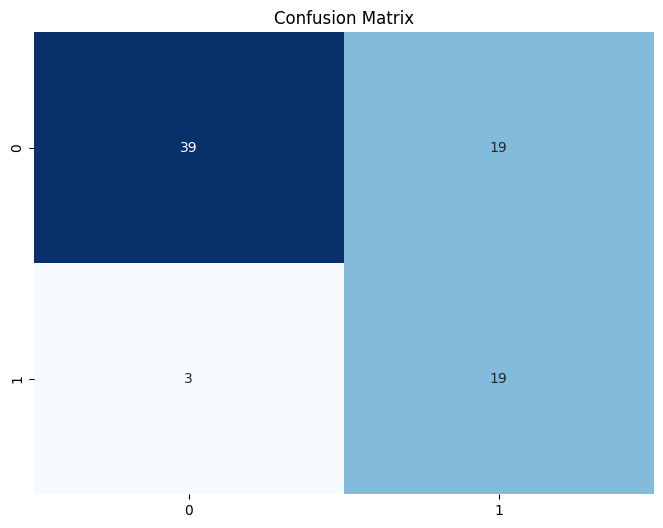

In [38]:
confusion_matrix_plot(Y_test, y_pred, "Confusion Matrix", "Blues")


## K-NN Training Set

<ipython-input-14-4537bd447978>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


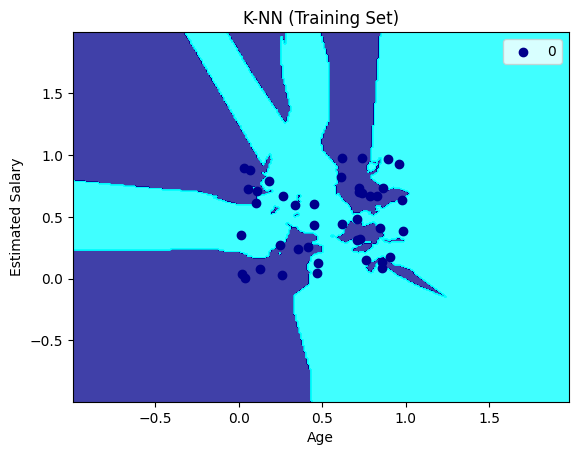

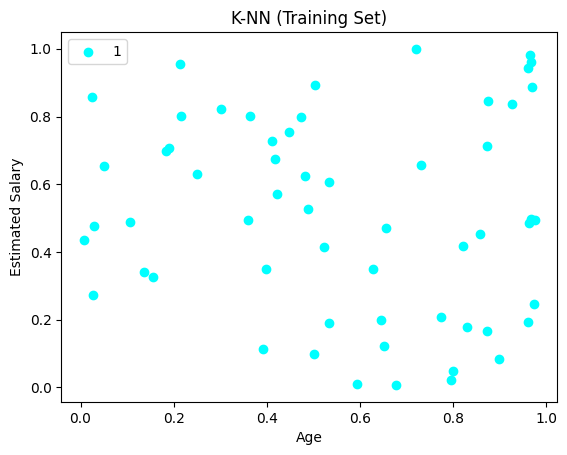

In [39]:
plot_decision_boundary(X_train, Y_train, classifier, title="K-NN (Training Set)", warna1="darkblue", warna2="cyan")


## K-NN Test Set

<ipython-input-14-4537bd447978>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


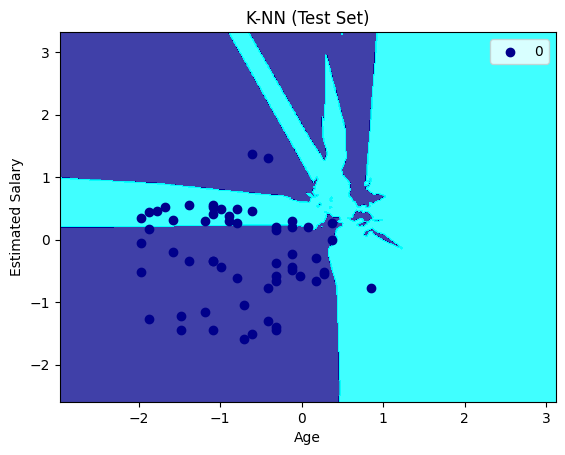

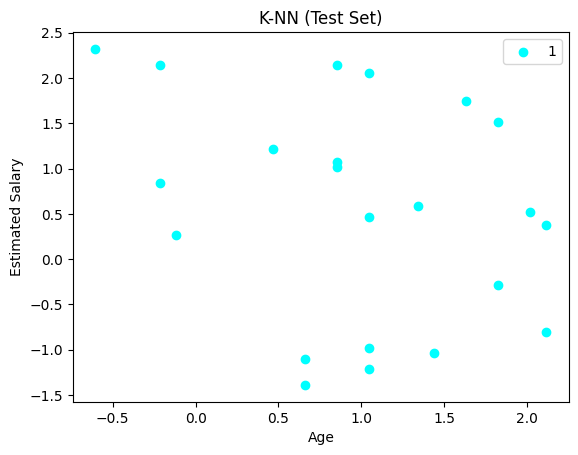

In [40]:
plot_decision_boundary(X_test, Y_test, classifier, title="K-NN (Test Set)", warna1="darkblue", warna2="cyan")
